In [1]:
import numpy as np
import torch
from torch.utils.data import DataLoader
import res.fnn.training as training
import res.process_data.process_raw_data as prd
import res.process_data.dire_and_coor as dc
import res.process_data.process_output as out
from res.process_data.dataset import tensor_dataset

### Training WGAN for real polymer data: one hot vector

In [ ]:
# prepare raw data
coordinates_input = prd.read_coordinate(16, '../../data/Coordinates.dat')
directions_input = dc.coor_direction_four(coordinates_input)
one_hot_vector = dc.one_hot_four(directions_input)

In [3]:
# training wgan for one hot vector
# initialize hyper-parameters
z_dim = 8
im_dim = 60
hidden_dim = 16
display_step = 50
lr = 0.0003
beta_1 = 0.5
beta_2 = 0.999
c_lambda = 10
disc_repeats = 5
batch_size = 128
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [4]:
# build dataset
shuffle = True
num_worker = 0
pin_memory = True
input_tensor = torch.Tensor(one_hot_vector)
dataset = tensor_dataset(input_tensor, 15, 4)
dataloader = DataLoader(dataset= dataset,
                            shuffle=shuffle,
                            batch_size=batch_size,
                            num_workers=num_worker,
                            pin_memory=pin_memory)

  0%|          | 0/782 [00:00<?, ?it/s]

Step 50: Generator loss: 9.491922243693843, Discriminator loss: 1.9376083121299743
Step 100: Generator loss: 8.894469804763794, Discriminator loss: -1.1704606561660766
Step 150: Generator loss: 1.832791830301285, Discriminator loss: -11.497037658691406
Step 200: Generator loss: 4.459215159416199, Discriminator loss: -10.804375869750976
Step 250: Generator loss: 5.970255794525147, Discriminator loss: -10.701398345947267
Step 300: Generator loss: 5.7049625205993655, Discriminator loss: -10.271149486541747
Step 350: Generator loss: 5.5833786106109615, Discriminator loss: -9.735743396759032
Step 400: Generator loss: 5.328880319595337, Discriminator loss: -9.139703002929688
Step 450: Generator loss: 4.744839162826538, Discriminator loss: -8.406159996032713
Step 500: Generator loss: 4.548206615447998, Discriminator loss: -7.662244003295902
Step 550: Generator loss: 4.193142518997193, Discriminator loss: -7.09460213279724
Step 600: Generator loss: 3.742326674461365, Discriminator loss: -6.893

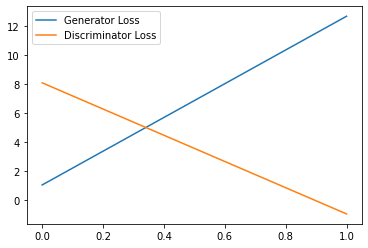

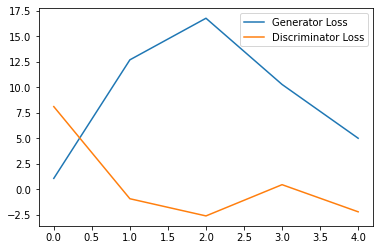

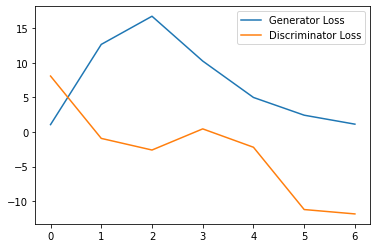

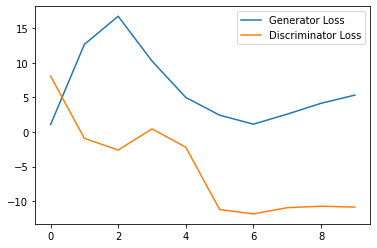

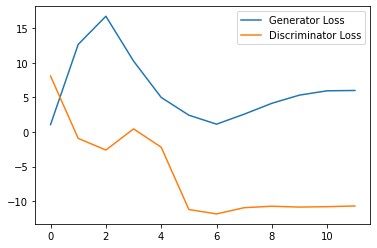

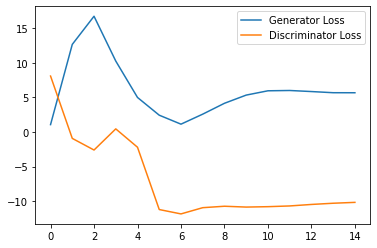

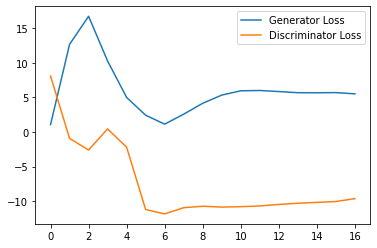

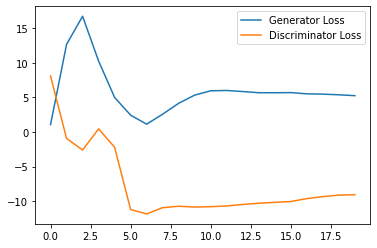

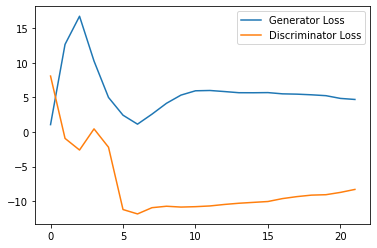

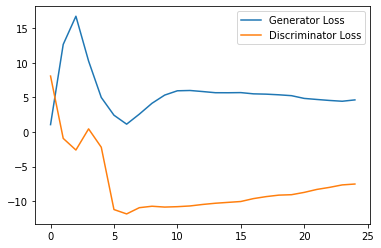

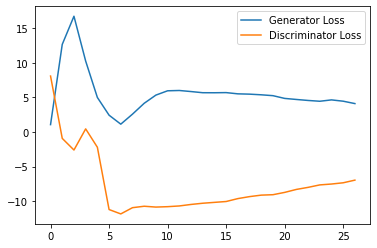

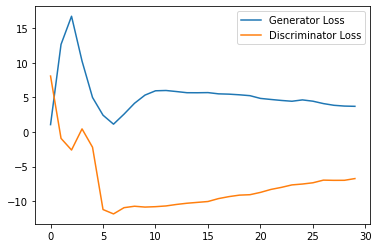

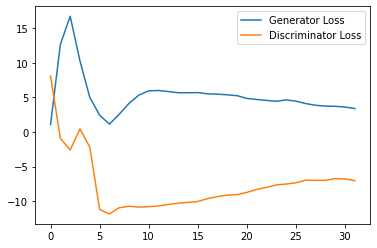

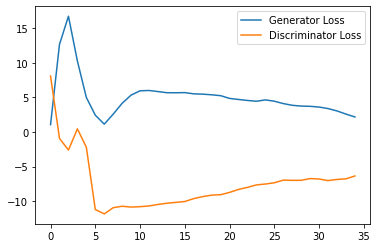

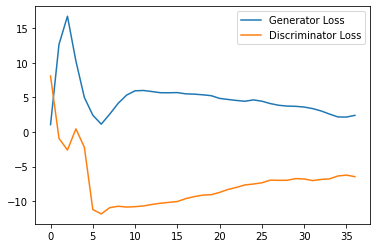

  0%|          | 0/782 [00:00<?, ?it/s]

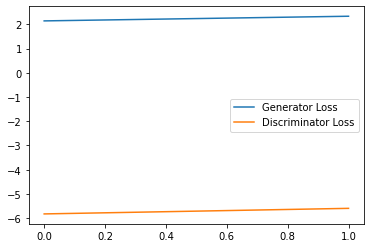

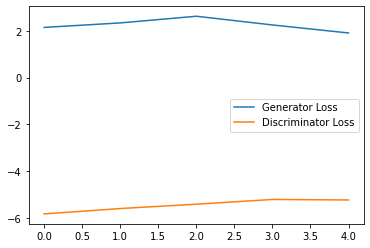

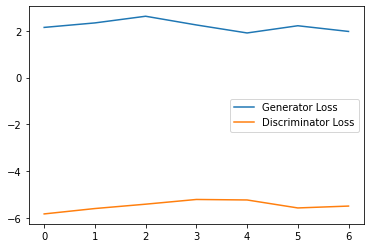

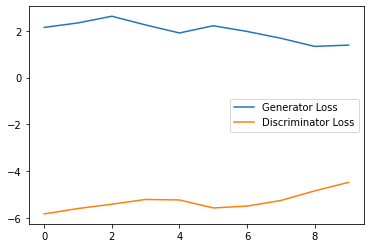

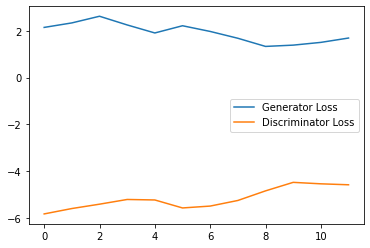

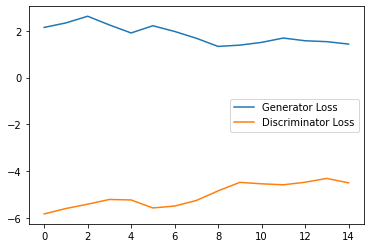

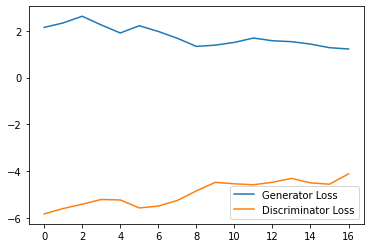

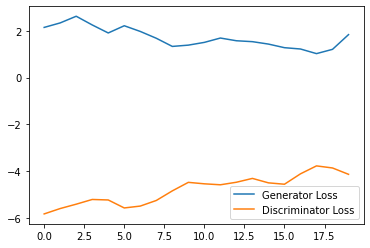

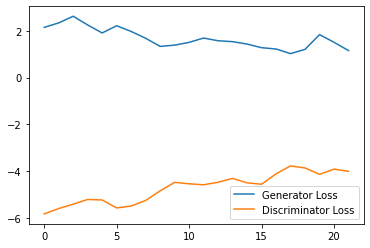

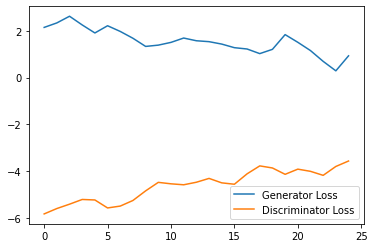

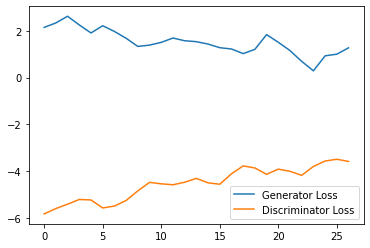

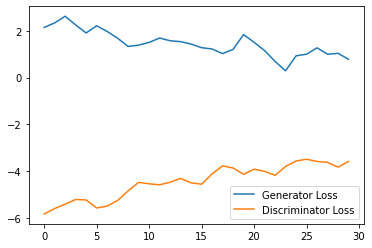

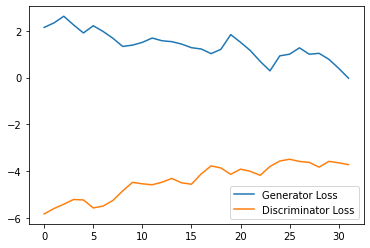

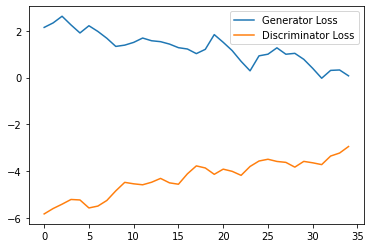

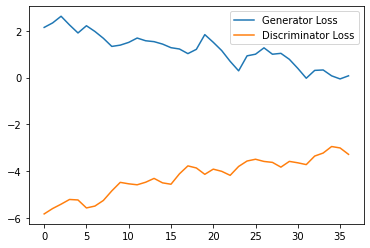

  0%|          | 0/782 [00:00<?, ?it/s]

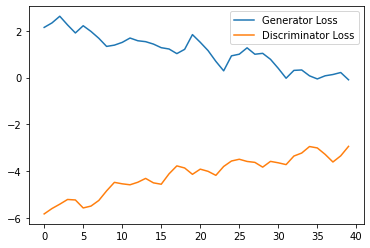

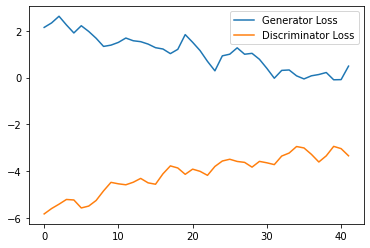

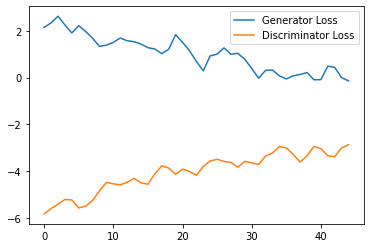

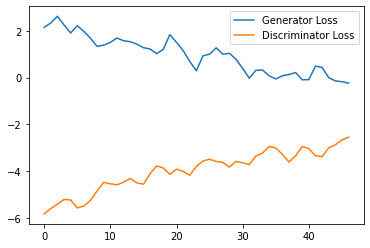

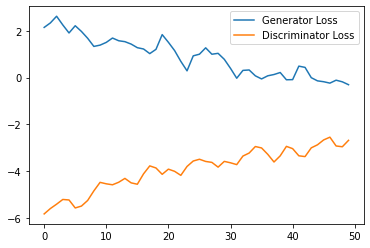

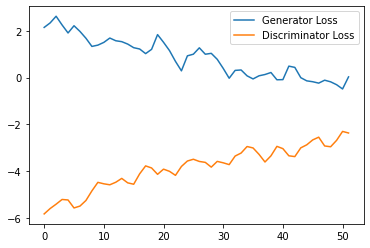

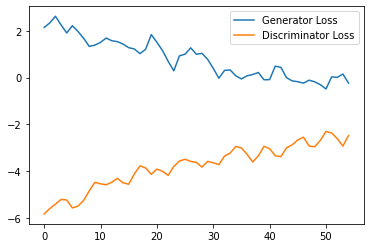

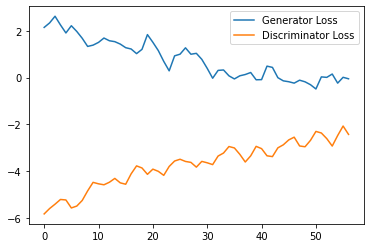

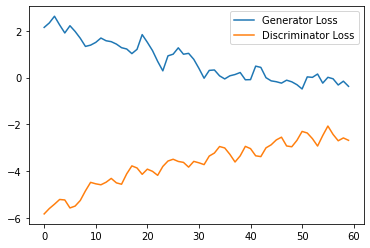

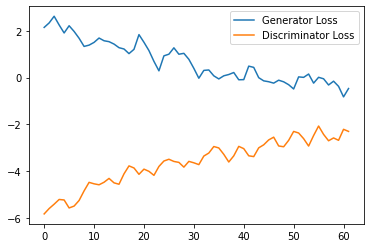

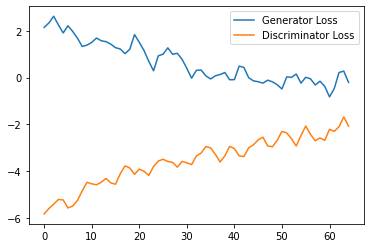

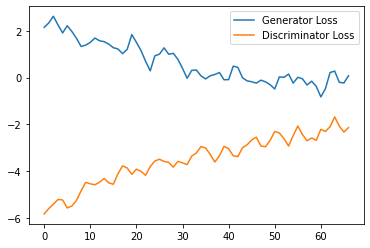

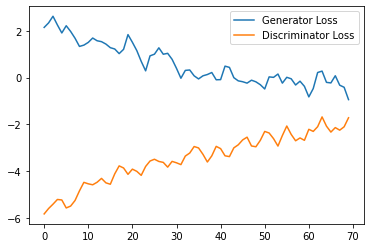

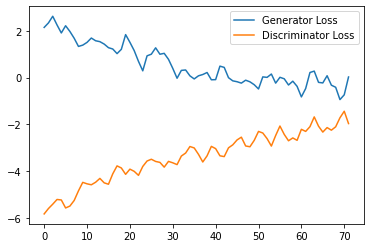

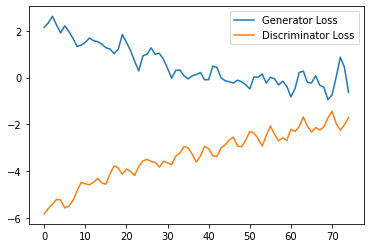

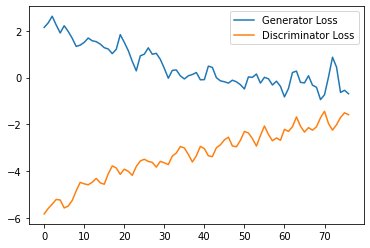

  0%|          | 0/782 [00:00<?, ?it/s]

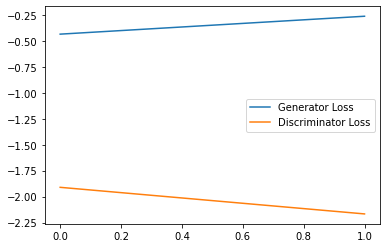

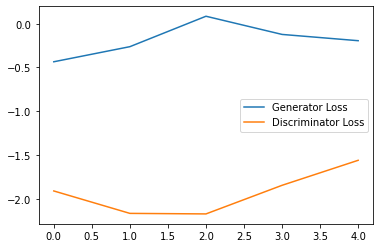

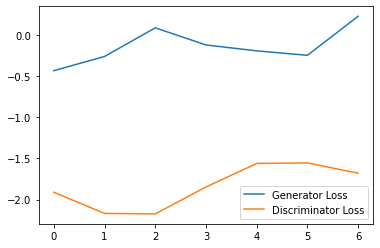

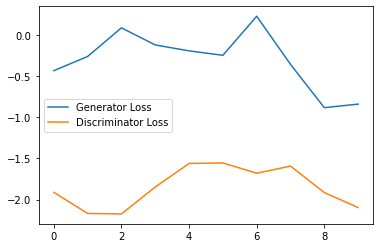

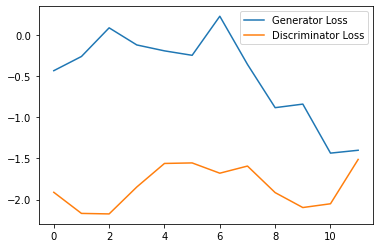

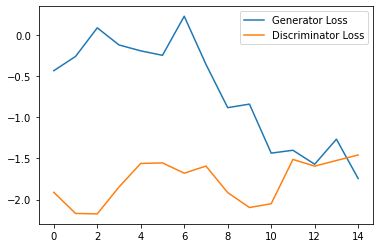

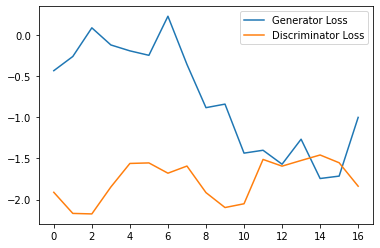

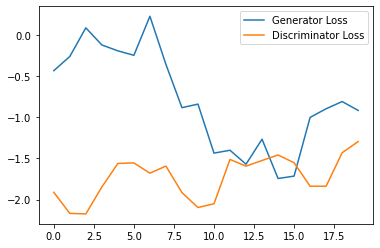

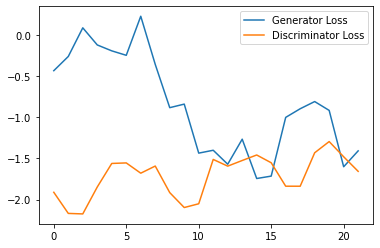

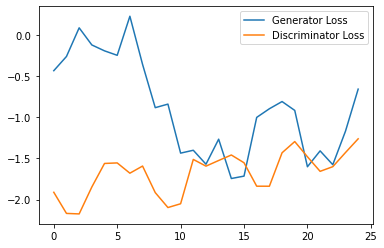

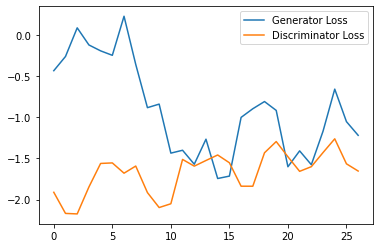

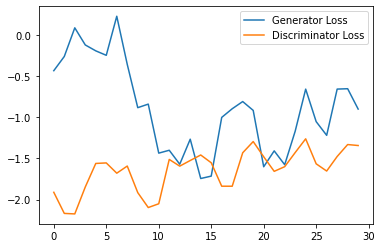

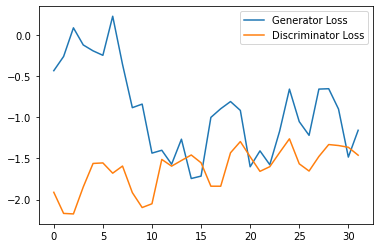

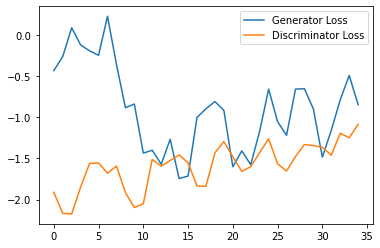

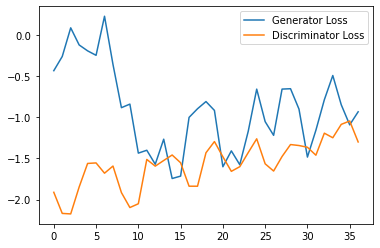

  0%|          | 0/782 [00:00<?, ?it/s]

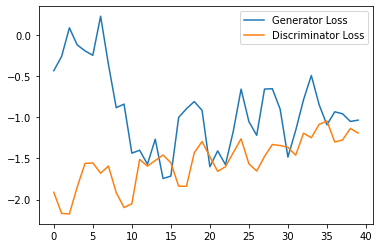

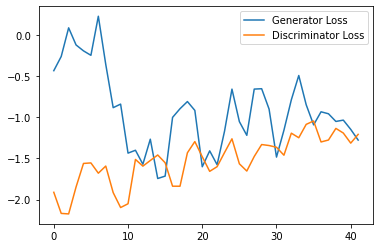

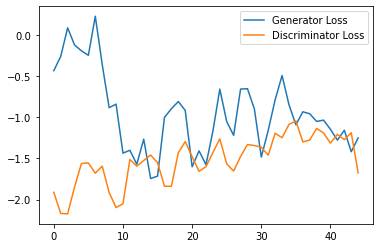

Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/dengnaicheng/opt/anaconda3/envs/nn/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/Users/dengnaicheng/opt/anaconda3/envs/nn/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/Users/dengnaicheng/opt/anaconda3/envs/nn/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
Traceback (most recent call last):
  File "/Users/dengnaicheng/opt/anaconda3/envs/nn/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/Users/dengnaicheng/opt/anaconda3/envs/nn/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/Users/dengnaicheng/opt/anaconda3/envs/nn/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/Users/dengn

KeyboardInterrupt: 

In [6]:
# initialize models
gen, disc, gen_opt, disc_opt = training.initialize_model(z_dim, im_dim, hidden_dim,
                                                         device, lr, beta_1, beta_2)
# save the initial models
n_epochs = 0
out.save_model(gen, disc, 'wgan_one_hot_real', n_epochs)

# train
for i in range(4):
    if i < 2:
        n_epochs += 10
        training.training_wloss(n_epochs, dataloader, device, disc_repeats, gen, gen_opt,
                   disc, disc_opt, z_dim, c_lambda, display_step)
        out.save_model(gen, disc, 'wgan_one_hot_real', n_epochs)
    else:
        n_epochs += 30
        training.training_wloss(n_epochs, dataloader, device, disc_repeats, gen, gen_opt,
                   disc, disc_opt, z_dim, c_lambda, display_step)
        out.save_model(gen, disc, 'wgan_one_hot_real', n_epochs)

### Training WGAN for random data, one hot vector

In [ ]:
# training for wgan, random, one hot vector
one_hot_random = np.random.rand(100000, 15, 4)

In [ ]:
# build dataset
input_tensor = torch.Tensor(one_hot_random)
dataset = tensor_dataset(input_tensor, 15, 4)
dataloader = DataLoader(dataset= dataset,
                            shuffle=shuffle,
                            batch_size=batch_size,
                            num_workers=num_worker,
                            pin_memory=pin_memory)

In [7]:
# initialize models
gen, disc, gen_opt, disc_opt = training.initialize_model(z_dim, im_dim, hidden_dim,
                                                         device, lr, beta_1, beta_2)
# save the initial models
n_epochs = 0
out.save_model(gen, disc, 'wgan_one_hot_random', n_epochs)

# train
for i in range(4):
    if i < 2:
        n_epochs += 10
        training.training_wloss(n_epochs, dataloader, device, disc_repeats, gen, gen_opt,
                   disc, disc_opt, z_dim, c_lambda, display_step)
        out.save_model(gen, disc, 'wgan_one_hot_random', n_epochs)
    else:
        n_epochs += 30
        training.training_wloss(n_epochs, dataloader, device, disc_repeats, gen, gen_opt,
                   disc, disc_opt, z_dim, c_lambda, display_step)
        out.save_model(gen, disc, 'wgan_one_hot_random', n_epochs)

NameError: name 'dataloader_random' is not defined

### WGAN, scalar, real

In [ ]:
z_dim = 4
im_dim = 15
hidden_dim = 16

shuffle = True
num_worker = 0
pin_memory = True
input_tensor = torch.Tensor(directions_input)
dataset = tensor_dataset(input_tensor, 15, 4)
dataloader = DataLoader(dataset= dataset,
                            shuffle=shuffle,
                            batch_size=batch_size,
                            num_workers=num_worker,
                            pin_memory=pin_memory)

In [ ]:
# initialize models
gen, disc, gen_opt, disc_opt = training.initialize_model(z_dim, im_dim, hidden_dim,
                                                         device, lr, beta_1, beta_2)
# save the initial models
n_epochs = 0
out.save_model(gen, disc, 'wgan_scalar_real', n_epochs)

# train
for i in range(4):
    if i < 2:
        n_epochs += 10
        training.training_wloss(n_epochs, dataloader, device, disc_repeats, gen, gen_opt,
                   disc, disc_opt, z_dim, c_lambda, display_step)
        out.save_model(gen, disc, 'wgan_scalar_real', n_epochs)
    else:
        n_epochs += 30
        training.training_wloss(n_epochs, dataloader, device, disc_repeats, gen, gen_opt,
                   disc, disc_opt, z_dim, c_lambda, display_step)
        out.save_model(gen, disc, 'wgan_scalar_real', n_epochs)

### WGAN, scalar, random

In [8]:
scalar_random = np.random.rand(100000, 15, 1)
input_tensor = torch.Tensor(scalar_random)
dataset = tensor_dataset(input_tensor, 15, 4)
dataloader = DataLoader(dataset= dataset,
                            shuffle=shuffle,
                            batch_size=batch_size,
                            num_workers=num_worker,
                            pin_memory=pin_memory)

In [ ]:
# initialize models
gen, disc, gen_opt, disc_opt = training.initialize_model(z_dim, im_dim, hidden_dim,
                                                         device, lr, beta_1, beta_2)
# save the initial models
n_epochs = 0
out.save_model(gen, disc, 'wgan_scalar_random', n_epochs)

# train
for i in range(4):
    if i < 2:
        n_epochs += 10
        training.training_wloss(n_epochs, dataloader, device, disc_repeats, gen, gen_opt,
                   disc, disc_opt, z_dim, c_lambda, display_step)
        out.save_model(gen, disc, 'wgan_scalar_random', n_epochs)
    else:
        n_epochs += 30
        training.training_wloss(n_epochs, dataloader, device, disc_repeats, gen, gen_opt,
                   disc, disc_opt, z_dim, c_lambda, display_step)
        out.save_model(gen, disc, 'wgan_scalar_random', n_epochs)